# Pymaceuticals Inc.
---

### Analysis

- Among the tested drug regimens, Capomulin and Ramicane were the most effective in controlling tumor growth, as indicated by their lower mean, median, variance, standard deviation, and SEM of tumor volume compared to other treatments.
- The line plot of tumor volume vs. time point for a mouse treated with Capomulin demonstrated a reduction in tumor volume over time, which supports the effectiveness of Capomulin in treating SCC tumors.
- The positive correlation between mouse weight and average tumor volume for the Capomulin regimen (correlation coefficient of around 0.84) suggests that an increase in mouse weight is associated with an increase in average tumor volume. This trend highlights the importance of considering weight as a potential confounding factor when analyzing the drug's effectiveness.
- The linear regression model confirmed a strong relationship between mouse weight and average tumor volume for the Capomulin regimen, with the fitted line accurately representing the data trend.
- The distribution of female and male mice in the study was well-balanced, ensuring that the results are not biased towards a specific sex.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
print(combined_data.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [16]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]


print("Duplicate Mice by ID number that shows up for Mouse ID and Timepoint:")
print(duplicate_mice[["Mouse ID", "Timepoint"]])

Duplicate Mice by ID number that shows up for Mouse ID and Timepoint:
     Mouse ID  Timepoint
137      g989          0
360      g989          5
681      g989         10
869      g989         15
1111     g989         20


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]


print("Data for the duplicate mouse ID(s):")
print(duplicate_mouse_data)

Data for the duplicate mouse ID(s):
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989   

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]


print("Clean DataFrame without duplicate mouse ID(s):")
print(clean_data.head())

Clean DataFrame without duplicate mouse ID(s):
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame: {num_mice_clean}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = clean_data.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                              "Median Tumor Volume": median_tumor_volume,
                              "Tumor Volume Variance": variance_tumor_volume,
                              "Tumor Volume Std. Dev.": std_dev_tumor_volume,
                              "Tumor Volume SEM": sem_tumor_volume})

print("Summary statistics table of tumor volume for each regimen:")
print(summary_stats)


Summary statistics table of tumor volume for each regimen:
              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print("Summary statistics table of tumor volume for each regimen using the aggregation method:")
print(summary_stats_agg)


Summary statistics table of tumor volume for each regimen using the aggregation method:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

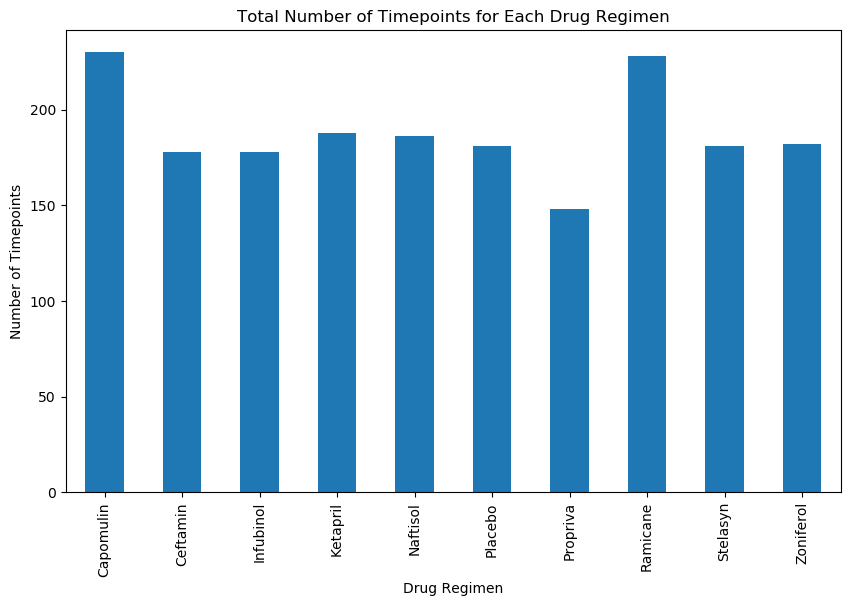

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_per_regimen = clean_data.groupby("Drug Regimen")["Timepoint"].count()
timepoints_per_regimen.plot(kind="bar", figsize=(10, 6), ylabel="Number of Timepoints", title="Total Number of Timepoints for Each Drug Regimen")
plt.show()


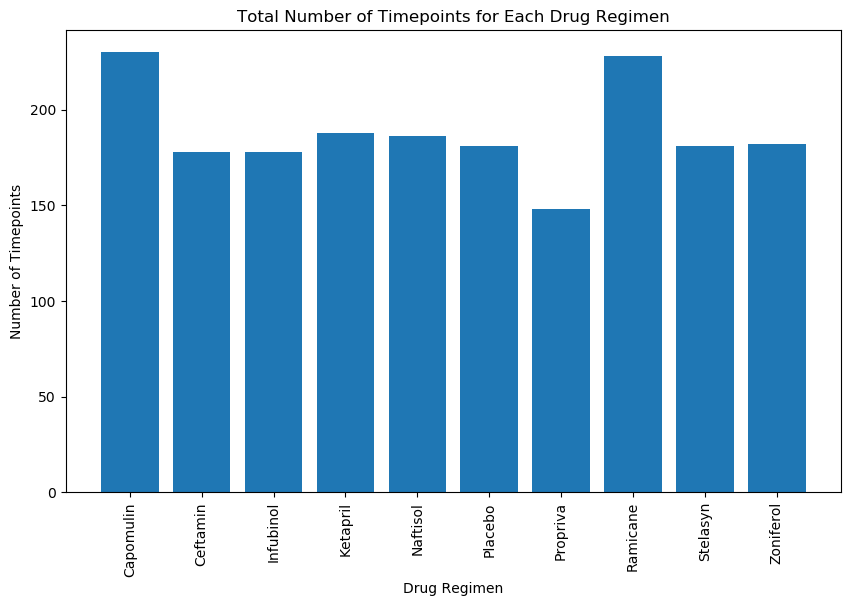

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_per_regimen = clean_data.groupby("Drug Regimen")["Timepoint"].count()
drug_regimens = timepoints_per_regimen.index
num_timepoints = timepoints_per_regimen.values

plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, num_timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation='vertical')

plt.show()


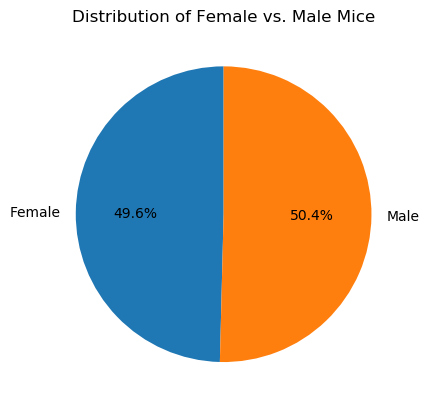

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data.groupby("Sex")["Mouse ID"].nunique()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=90, ylabel='', title="Distribution of Female vs. Male Mice")
plt.show()

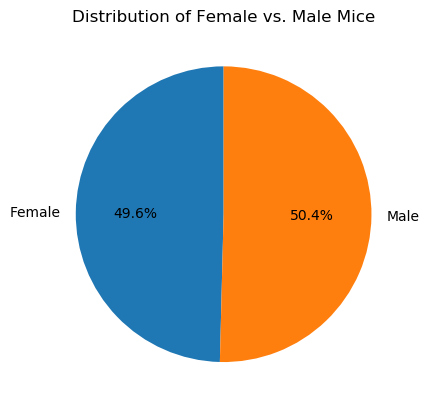

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = clean_data.groupby("Sex")["Mouse ID"].nunique()
sex_labels = gender_distribution.index
num_mice = gender_distribution.values
plt.pie(num_mice, labels=sex_labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_regimens = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_regimens.groupby("Mouse ID")["Timepoint"].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
print("Data for the final tumor volume of each mouse across the specified treatment regimens:")
print(merged_data)

Data for the final tumor volume of each mouse across the specified treatment regimens:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    In

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # Determine outliers using upper and lower bounds
   
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]


    # Print results
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} potential outliers: {outliers.values}")

Capomulin IQR: 7.781863460000004
Capomulin potential outliers: []
Ramicane IQR: 9.098536719999998
Ramicane potential outliers: []
Infubinol IQR: 11.477135160000003
Infubinol potential outliers: [36.3213458]
Ceftamin IQR: 15.577752179999997
Ceftamin potential outliers: []


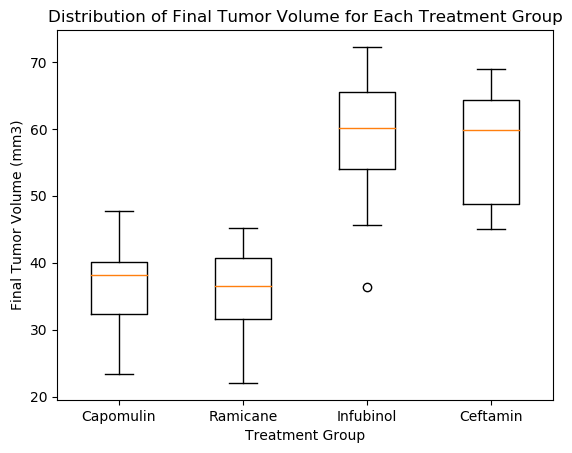

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments)

ax.set_title("Distribution of Final Tumor Volume for Each Treatment Group")
ax.set_xlabel("Treatment Group")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

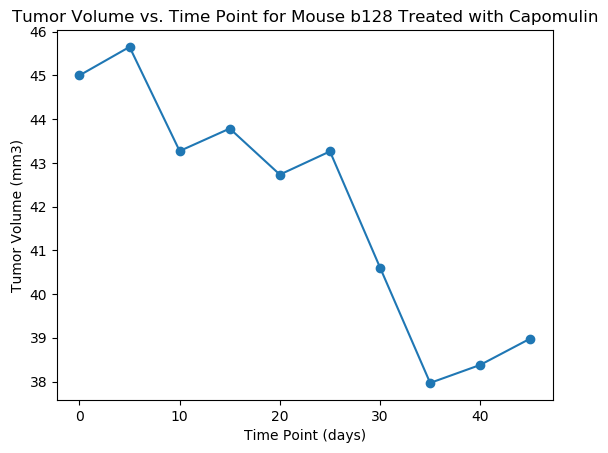

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].iloc[0]
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


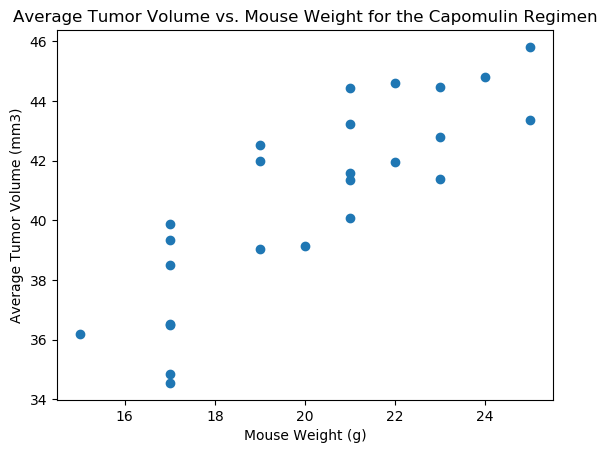

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], marker="o")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
The linear regression model for mouse weight and average tumor volume for the Capomulin regimen is: 
Tumor Volume = 0.95 * Weight + 21.55


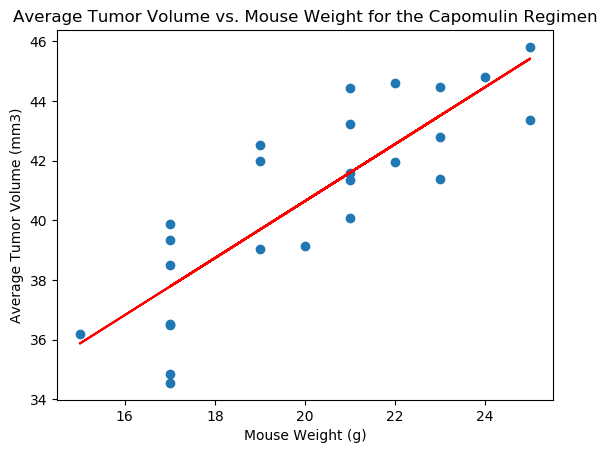

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient, _ = st.pearsonr(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The linear regression model for mouse weight and average tumor volume for the Capomulin regimen is: \nTumor Volume = {slope:.2f} * Weight + {intercept:.2f}")

plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], marker="o")
plt.plot(avg_tumor_volume["Weight (g)"], slope * avg_tumor_volume["Weight (g)"] + intercept, color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()